*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```parameter_tuning_GRU.csv``` file before running

# Hyperparameter Tuning for GRU

Tuning was performed on region 11 using the years 2014, 2013, 2012, 2011 for training, 2010 for validation, and 2009 for testing. The year 2009 is used here to evaluate performance metrics for hyperparameter tuning.

## Loading experiment logs

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('parameter_tuning_GRU.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 108 rows and 57 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,mae_clipped,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,training_curve_path
0,20250506_085801,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,gru,...,0.16676,0.98266,0.09312,0.30515,0.17249,0.98286,0.03541,"1.15205,0.10213,0.09380,0.09096,0.08929,0.0879...","0.11370,0.09961,0.09636,0.09400,0.09442,0.0928...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250506_085801,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,gru,...,0.16802,0.98199,0.09457,0.30752,0.17354,0.98252,0.05600,"1.21230,0.10908,0.09620,0.09223,0.09025,0.0886...","0.13040,0.10370,0.09702,0.09736,0.09303,0.0930...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250506_085801,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,gru,...,0.17107,0.98202,0.09480,0.30790,0.17662,0.98249,0.05389,"1.11885,0.10497,0.09616,0.09314,0.09177,0.0906...","0.11961,0.10004,0.09671,0.09459,0.09646,0.0938...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250506_085811,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,gru,...,0.18032,0.98209,0.09461,0.30759,0.17989,0.98249,0.05042,"2.95721,0.59354,0.54072,0.48657,0.42375,0.3572...","0.16008,0.12517,0.11493,0.11327,0.10705,0.1031...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250506_085821,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,gru,...,0.17464,0.98202,0.09393,0.30648,0.17624,0.98268,0.06354,"1.09943,0.32678,0.30103,0.27499,0.24455,0.2135...","0.11465,0.10290,0.09626,0.09690,0.09470,0.0959...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


## Average performance by metrics and hyperparameters

In [ ]:
# Filter relevant columns
relevant_columns = ['dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
df_filtered = df[relevant_columns].copy()

# Group by configuration and compute mean metrics
df_grouped = df_filtered.groupby(['dropout', 'weight_decay', 'hidden_size']).mean().reset_index()


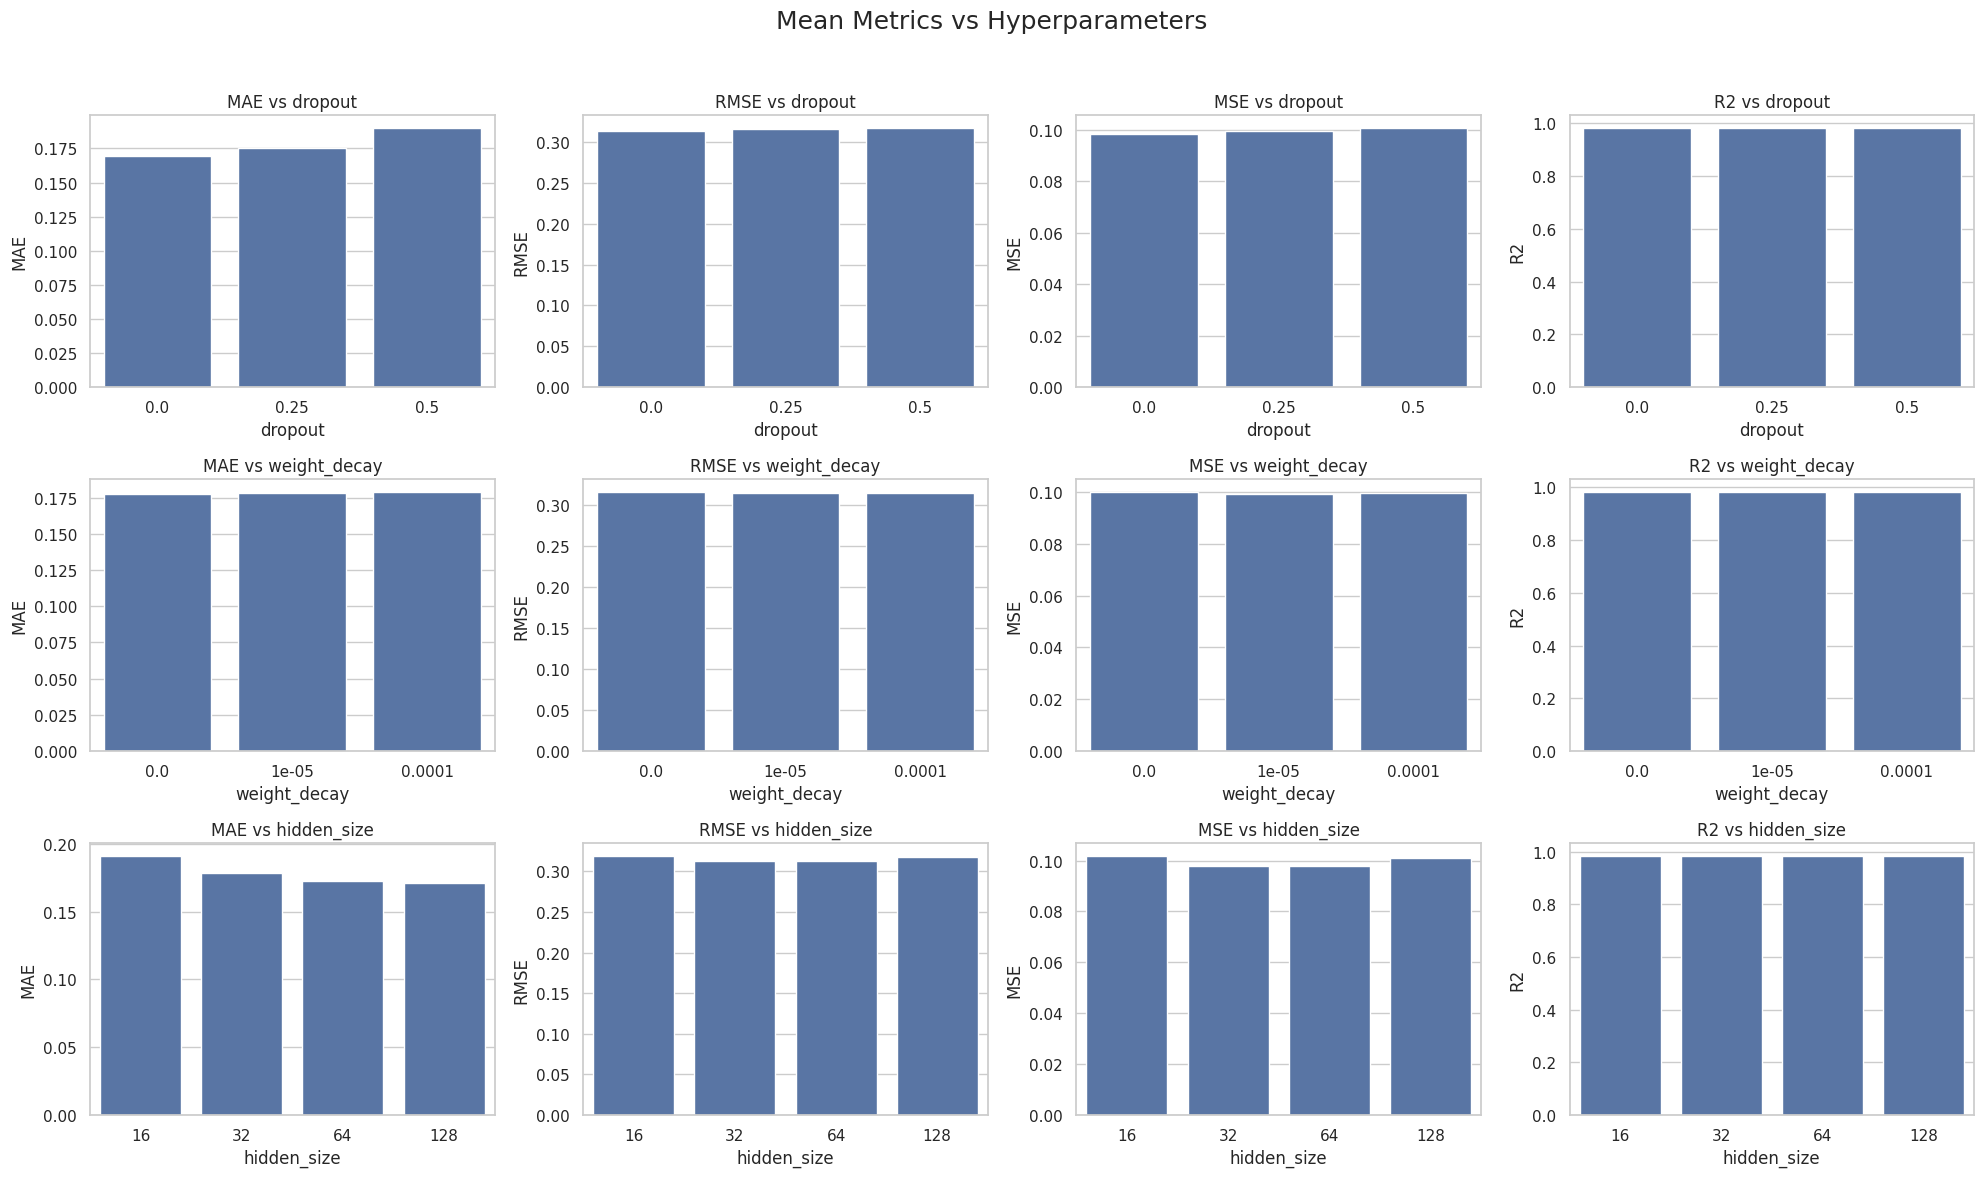

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Define metrics and hyperparameters
metrics = ['mae', 'rmse', 'mse', 'r2']
hyperparams = ['dropout', 'weight_decay', 'hidden_size']

# Create a 3x4 grid: rows = hyperparameters, columns = metrics
fig, axes = plt.subplots(len(hyperparams), len(metrics), figsize=(20, 12))

for i, param in enumerate(hyperparams):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        sns.barplot(data=df_grouped, x=param, y=metric, errorbar=None, ax=ax)
        ax.set_title(f'{metric.upper()} vs {param}')
        ax.set_xlabel(param)
        ax.set_ylabel(metric.upper())

plt.suptitle('Mean Metrics vs Hyperparameters', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

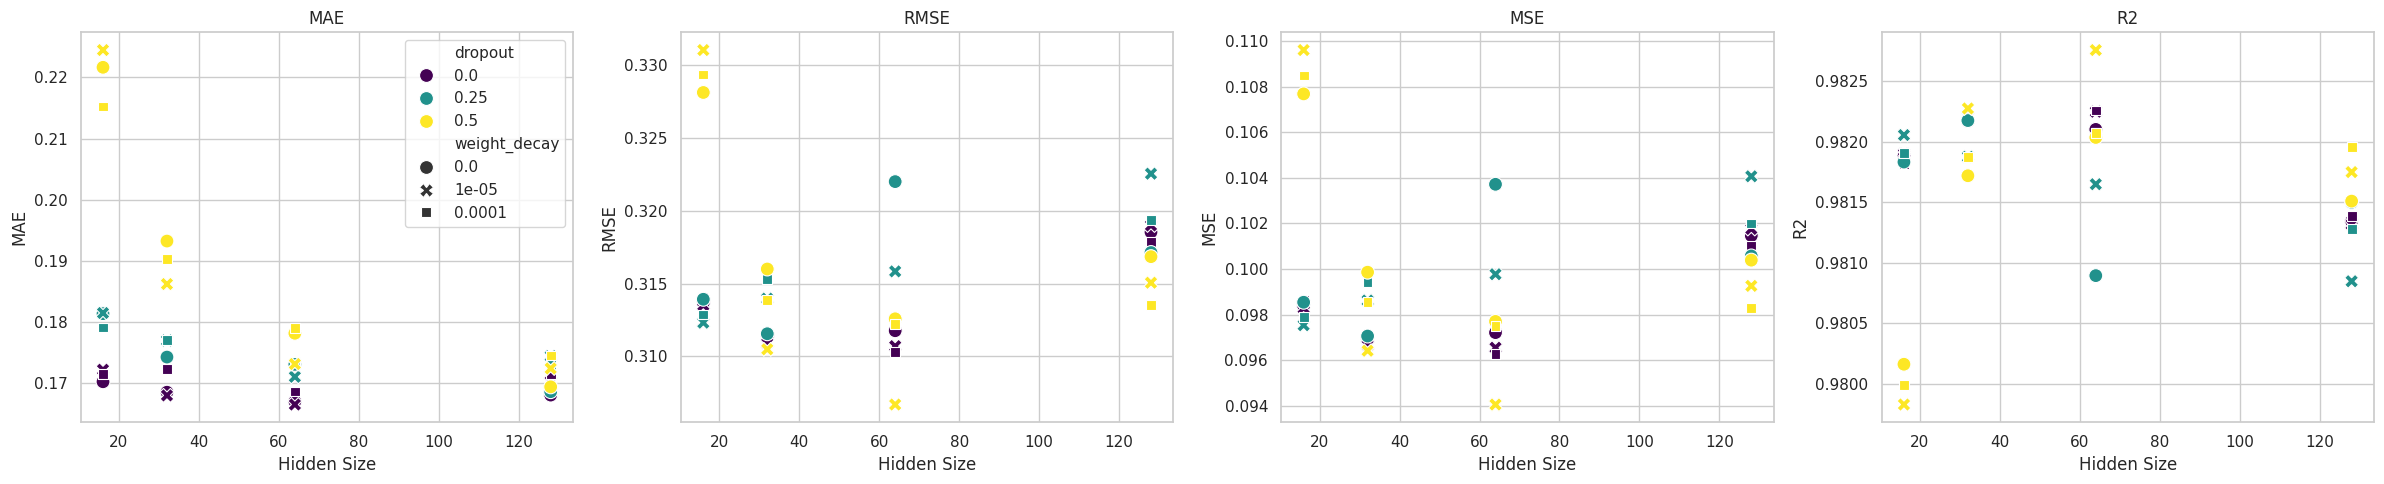

In [ ]:
sns.set(style="whitegrid")

# Create one row with four scatterplots (one per metric)
fig, axes = plt.subplots(1, len(metrics), figsize=(24, 5))

for i, metric in enumerate(metrics):
    ax = axes[i]
    scatter = sns.scatterplot(
        data=df_grouped,
        x='hidden_size',
        y=metric,
        hue='dropout',
        style='weight_decay',
        palette='viridis',
        s=100,
        ax=ax,
        legend=(i == 0)  # Only show legend in the first subplot
    )
    ax.set_title(f'{metric.upper()}')
    ax.set_xlabel('Hidden Size')
    ax.set_ylabel(metric.upper())

plt.tight_layout()
plt.show()

## Best configurations (averaged)

In [ ]:
for metric in metrics:
    print(f"\nTop 3 Configurations by {metric.upper()}:")

    # Sort ascending for all except R² (which is better when higher)
    ascending = False if metric == 'r2' else True

    top_configs = df_grouped.sort_values(by=metric, ascending=ascending).head(3)
    display_columns = ['dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
    display(top_configs[display_columns])


Top 3 Configurations by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
6,0.0,0.00001,64,0.166527,0.310703,0.096560,0.982250
2,0.0,0.00000,64,0.167013,0.311760,0.097220,0.982103
5,0.0,0.00001,32,0.168020,0.310897,0.096663,0.982213



Top 3 Configurations by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
30,0.5,0.00001,64,0.173147,0.306693,0.094070,0.982760
10,0.0,0.00010,64,0.168657,0.310287,0.096300,0.982260
29,0.5,0.00001,32,0.186227,0.310483,0.096427,0.982277



Top 3 Configurations by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
30,0.5,0.00001,64,0.173147,0.306693,0.094070,0.982760
10,0.0,0.00010,64,0.168657,0.310287,0.096300,0.982260
29,0.5,0.00001,32,0.186227,0.310483,0.096427,0.982277



Top 3 Configurations by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
30,0.5,0.00001,64,0.173147,0.306693,0.094070,0.982760
29,0.5,0.00001,32,0.186227,0.310483,0.096427,0.982277
10,0.0,0.00010,64,0.168657,0.310287,0.096300,0.982260


- **MAE Best Configuration**:  
  `dropout = 0.0`, `weight_decay = 1e-5`, `hidden_size = 64`  
  This configuration achieves the lowest average absolute error. Once again, we see that an unregularized or lightly regularized setup with moderate capacity offers the most accurate average predictions, consistent with trends observed in both RNN and LSTM.

- **RMSE & MSE Best Configuration**:  
  `dropout = 0.5`, `weight_decay = 1e-5`, `hidden_size = 64`  
  These metrics point to a more regularized model with substantial dropout as the top performer. As in the RNN case, this suggests that when penalizing large errors more heavily, introducing strong dropout may enhance robustness—especially when paired with a stable hidden size like 64.

- **R² Best Configuration**:  
  Also `dropout = 0.5`, `weight_decay = 1e-5`, `hidden_size = 64`  
  This setup yields the highest explained variance. Similar to both RNN and LSTM, we again find that regularization (dropout + weight decay) enhances generalization when judged by variance-based metrics.

Despite the different emphases of each metric, the top configurations remain very close in performance. For example, the RMSE for the best regularized configuration (0.3067) is only about 0.004 lower than the MAE-optimal one (0.3107), and their R² scores differ by less than 0.001. These small differences indicate that GRU, like RNN and LSTM, performs reliably across a range of regularization strategies, with no-dropout setups excelling in raw accuracy and high-dropout variants providing slightly better overall fit.





In [ ]:
best_rows = []

for metric in metrics:
    ascending = False if metric == 'r2' else True
    top_config = df_grouped.sort_values(by=metric, ascending=ascending).head(1).copy()
    top_config['best_for'] = metric.upper()
    best_rows.append(top_config)

# Concatenate and remove duplicates
best_df = pd.concat(best_rows)

# Define column order
display_columns = ['best_for', 'dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
display(best_df[display_columns])

,best_for,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
6,MAE,0.0,0.00001,64,0.166527,0.310703,0.09656,0.98225
30,RMSE,0.5,0.00001,64,0.173147,0.306693,0.09407,0.98276
30,MSE,0.5,0.00001,64,0.173147,0.306693,0.09407,0.98276
30,R2,0.5,0.00001,64,0.173147,0.306693,0.09407,0.98276
